# Data analisis dan visualisasi data teknikal finance menggunakan piton

### bagaiaman cara menggunakan python library seperti pandas, matplotlib dan seaborn untuk mendapatakan insights dari data harga volum stock harian dari pasar saham

# 1. Tentang Data nya

For this analysis, 2 years of historical data from around mid-Feb 2018 to Feb 2020 of the below stocks listed on National Stock Exchange(NSE)— https://www1.nseindia.com/global/content/about_us/about_us.htm were used.

- HDFC Ltd.
- Sun Pharmaceutical Industries Ltd.
- Tata Consultancy Services Ltd.
- Jindal Steel & Power Ltd.
- Jubilant FoodWorks Ltd.

The selected stocks are from different sectors and market cap. For the start, we’ll investigate the HDFC stock individually and then move on to the combined analysis. For this section, the csv file of historical data of HDFC stock has been downloaded from Yahoo finance https://in.finance.yahoo.com/.

# 2. Data Understanding and General Statistics

import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

Read data from csv file and display first few rows

In [2]:
HDFC_df = pd.read_csv("Salinan HDFCBANK.NS.csv")
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.849976,947.375000,937.500000,940.950012,927.139465,2457612.0
1,2018-02-16,941.950012,947.424988,937.825012,939.299988,925.513611,1791760.0
2,2018-02-19,941.299988,943.799988,929.525024,939.099976,925.316528,1827276.0
3,2018-02-20,942.375000,942.924988,929.400024,931.599976,917.926697,2042034.0
4,2018-02-21,933.974976,934.275024,926.099976,928.700012,915.069214,1376536.0


since out time-frame of analysis is large, we can relax on number of decimal places to consider.

In [3]:
HDFC_df = HDFC_df.round(2)
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
1,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0
2,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0
3,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0
4,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0


better! lets determine the shape of dataset

In [4]:
HDFC_df.shape

(491, 7)

In [5]:
HDFC_df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

kita buang yang null

In [6]:
HDFC_df.dropna(inplace=True, axis=0)

kita cek juga data type tiap column nya

In [7]:
HDFC_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

ternyata untuk kolom date nya harus diubah ke datetime
kita pake pandas untuk merubah date ke datetime

In [8]:
HDFC_df["Date"] = pd.to_datetime(HDFC_df["Date"])
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
1,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0
2,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0
3,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0
4,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0


In [9]:
HDFC_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

data date sudah berubah ke format datetime

In [10]:
type(HDFC_df.loc[0, "Date"])

pandas._libs.tslibs.timestamps.Timestamp

lalu kita mengambil data date dari terakhir hingga pertama

In [11]:
HDFC_df["Date"].max() - HDFC_df["Date"].min()

Timedelta('729 days 00:00:00')

kita ngambil data 90 hari terakhir dari awal data

In [12]:
HDFC_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

ada beberapa error tadi, karna tutorial nya masih lama, jadi ada beberap perubahan di pandas version terbaru, sehingga seharusnya date tidak terikut, namun masih terikut di operasi describe

solusi nya = menggunakan slect_dtypes untuk filter tipe data yang diinginkan

In [13]:
HDFC_df.iloc[-90:].select_dtypes(include=["number"]).describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume
count,90,90,90,90,90,90
mean,1255,1263,1243,1252,1252,5973670
std,24,22,25,24,24,1824496
min,1197,1197,1177,1186,1186,1836849
25%,1242,1248,1227,1239,1239,4651834
50%,1256,1262,1243,1253,1253,5792594
75%,1276,1281,1264,1272,1272,6685996
max,1305,1305,1288,1302,1302,11256610


## 3. General variation in the stock price

Sebelum kita melanjutkan ke penyelidikan lebih lanjut, kita akan mengatur kolom ‘Tanggal’ sebagai indeks dari dataframe. Hal ini memudahkan pembuatan plot.

In [14]:
HDFC_df.index = HDFC_df["Date"]

In [15]:
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-02-15,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0
2018-02-16,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0
2018-02-19,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0
2018-02-20,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0
2018-02-21,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0


sekarang kita plot closing price dari stock dari periode 2 tahun untuk mendapatkan insight tentang general variation dalam harga stock tersebut

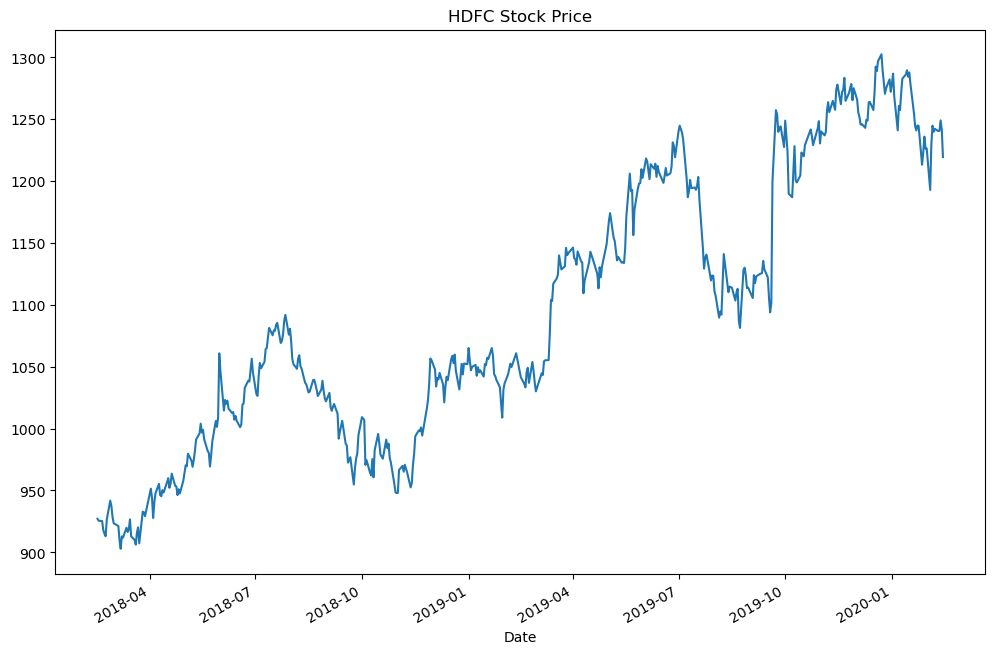

In [16]:
HDFC_df["Adj Close"].plot(
    figsize=(12, 8),
    title="HDFC Stock Price",
)
plt.show()

In the above plot, if you notice, there is a drastic decrease in the price of stock sometime around the month of September 2018. Apart from the “September effect”, the general decline in the stock price of HDFC can be attributed to the escalating tariff war between the US and China: https://www.vox.com/world/2018/7/6/17542482/china-trump-trade-war-tariffs that had a ripple effect on Indian financial markets.

## 4. Day-to-day percentage change(Daily returns)

Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was ₹500 and today the stock closed as ₹550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100. No mystery here!

Accordingly, we’ll introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock. This can be done using in-built pct_change() function in python.

Great question!

```python
HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change() * 1
```

### 🔍 Apa itu `pct_change()`?

`pct_change()` adalah fungsi di **pandas** untuk menghitung **persentase perubahan** antar baris dalam kolom numerik.

> 🔢 Artinya:
> **Seberapa besar perubahan (naik/turun) dari baris sebelumnya ke baris sekarang**, dalam bentuk **persentase**.

---

### 📘 Rumus `pct_change()`:

Untuk baris ke-*i*:

```text
(df[i] - df[i-1]) / df[i-1]
```

Misalnya:

| Hari | Adj Close |
| ---- | --------- |
| 1    | 100       |
| 2    | 110       |
| 3    | 90        |

Maka:

* Hari 2: `(110 - 100) / 100 = 0.10` → naik 10%
* Hari 3: `(90 - 110) / 110 = -0.1818` → turun \~18.18%

---

### 🤔 Kenapa dikali `* 1`?

Jawabannya: **tidak ngaruh apa-apa**.
Itu mungkin hanya placeholder atau keliru.

Kalau ingin jadi **persen (dalam %)**, seharusnya:

```python
HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change() * 100
```

Agar hasilnya jadi:

| Hari | Adj Close | Day\_Perc\_Change |
| ---- | --------- | ----------------- |
| 1    | 100       | NaN               |
| 2    | 110       | 10.0              |
| 3    | 90        | -18.18            |

---

### 🧠 Catatan:

* Baris pertama hasilnya `NaN`, karena tidak ada data sebelumnya untuk dibandingkan.
* Gunakan `.fillna(0)` jika kamu mau isi awalnya jadi nol:

  ```python
  HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change().fillna(0) * 100
  ```

---


In [18]:
HDFC_df["Day_Perc_Change"] = HDFC_df["Adj Close"].pct_change()*100
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-15,2018-02-15,944.85,947.38,937.50,940.95,927.14,2457612.0,NaN
2018-02-16,2018-02-16,941.95,947.42,937.83,939.30,925.51,1791760.0,-0.175809
2018-02-19,2018-02-19,941.30,943.80,929.53,939.10,925.32,1827276.0,-0.020529
2018-02-20,2018-02-20,942.38,942.92,929.40,931.60,917.93,2042034.0,-0.798643
2018-02-21,2018-02-21,933.97,934.28,926.10,928.70,915.07,1376536.0,-0.311571


You’ll notice that the first value in the ‘Day_Perc_Change’ column is NaN. We’ll drop this row.

In [19]:
# menghapus bari pertama yang hasil pct_change = NaN
HDFC_df.dropna(axis = 0, inplace = True)

In [20]:
HDFC_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-02-16,2018-02-16,941.95,947.42,937.83,939.3,925.51,1791760.0,-0.175809
2018-02-19,2018-02-19,941.30,943.80,929.53,939.1,925.32,1827276.0,-0.020529
2018-02-20,2018-02-20,942.38,942.92,929.40,931.6,917.93,2042034.0,-0.798643
2018-02-21,2018-02-21,933.97,934.28,926.10,928.7,915.07,1376536.0,-0.311571
2018-02-22,2018-02-22,925.00,930.00,920.78,926.6,913.00,6626798.0,-0.226212


Representing daily returns in form of a plot —

<Axes: xlabel='Date'>

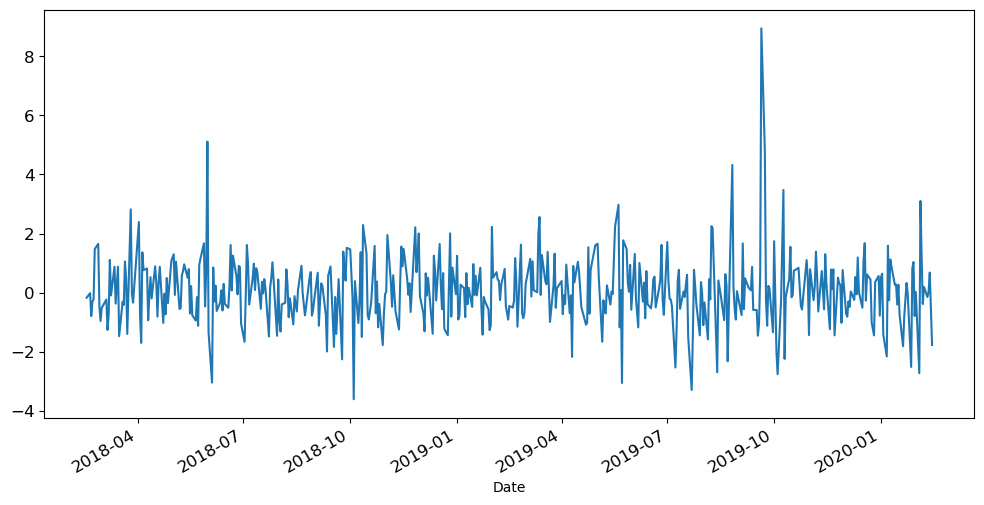

In [21]:
HDFC_df["Day_Perc_Change"].plot(figsize = (12, 6), fontsize = 12)

It can be observed that for most of the days, the returns are between -2% to 2% with few spikes in between crossing 6% mark on both the sides.

Likewise you can find similar news articles for the days when there was drastic rise/fall in the price of the stock.

Plotting daily returns distribution histogram —

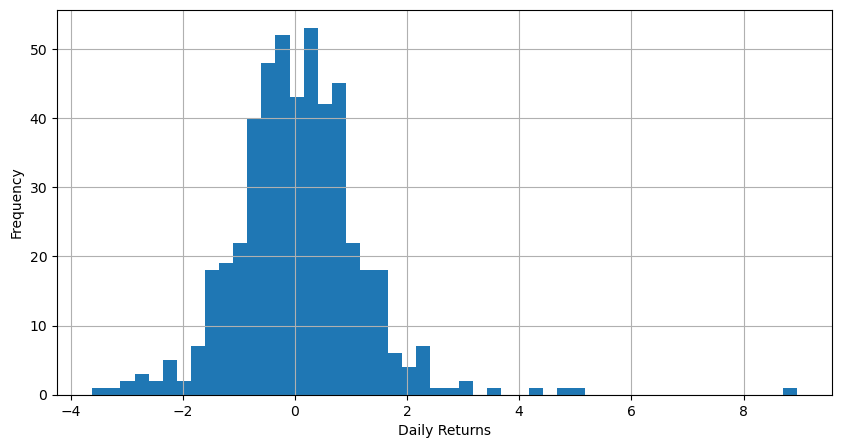

count    489.000000
mean       0.062724
std        1.162384
min       -3.614446
25%       -0.596775
50%        0.020391
75%        0.693165
max        8.950547
Name: Day_Perc_Change, dtype: float64

In [22]:
HDFC_df["Day_Perc_Change"].hist(
    bins= 50,
    figsize=(10, 5)
)

plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

HDFC_df.Day_Perc_Change.describe()